In [1]:
import anndata.logging
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn


In [3]:
import mubind as mb

In [4]:
import os
working_dir = os.path.expanduser('~/workspace/theislab/mubind/docs/notebooks/scatac')
if os.path.exists(working_dir):
    os.chdir(working_dir)

In [5]:
import numpy as np
import os
import torch
import itertools
import glob
import pandas as pd
from pathlib import Path
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../../../annotations'
import torch
import mubind as mb
from tqdm.notebook import tqdm_notebook as tqdm

In [6]:
pwms = mb.datasets.archetypes()
# pwms = mb.datasets.genre()

HOCOMOCOv11_core_HUMAN_mono_meme_format.meme
HOCOMOCOv11_core_MOUSE_mono_meme_format.meme
JASPAR2018_CORE_vertebrates_non-redundant_pfms.meme
table_s3-1.meme
table_s3-2.meme
table_s3-3.meme
table_s3-4.meme
table_s3-5.meme
table_s3-6.meme
# motifs loaded 2179


In [7]:
reduced_groups = [p.to_numpy() for p in pwms]
# print(len(reduced_groups))

In [8]:
# reduced_groups = reduced_groups[:4]
# reduced_groups = reduced_groups[:1]

In [9]:

criterion = mb.tl.PoissonLoss()

n_rounds = 1
n_batches = 100
enr_series = 0

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = mb.models.Multibind(
    datatype="selex",
    kernels=[0] + [m.shape[-1] for m in reduced_groups],
    n_rounds=n_rounds,
    init_random=False,
    n_batches=n_batches,
    enr_series=enr_series,
    use_dinuc=False,
    dinuc_mode=None# 'full',
).to(device)

model

Using device: cuda:0


Multibind(
  (padding): ConstantPad2d(padding=(23, 23, 0, 0), value=0.25)
  (binding_modes): BindingModesSimple(
    (conv_mono): ModuleList(
      (0): None
      (1): Conv2d(1, 1, kernel_size=(4, 9), stride=(1, 1), bias=False)
      (2): Conv2d(1, 1, kernel_size=(4, 18), stride=(1, 1), bias=False)
      (3): Conv2d(1, 1, kernel_size=(4, 9), stride=(1, 1), bias=False)
      (4): Conv2d(1, 1, kernel_size=(4, 13), stride=(1, 1), bias=False)
      (5): Conv2d(1, 1, kernel_size=(4, 14), stride=(1, 1), bias=False)
      (6): Conv2d(1, 1, kernel_size=(4, 13), stride=(1, 1), bias=False)
      (7): Conv2d(1, 1, kernel_size=(4, 17), stride=(1, 1), bias=False)
      (8): Conv2d(1, 1, kernel_size=(4, 17), stride=(1, 1), bias=False)
      (9): Conv2d(1, 1, kernel_size=(4, 13), stride=(1, 1), bias=False)
      (10): Conv2d(1, 1, kernel_size=(4, 12), stride=(1, 1), bias=False)
      (11): Conv2d(1, 1, kernel_size=(4, 15), stride=(1, 1), bias=False)
      (12): Conv2d(1, 1, kernel_size=(4, 8), strid

In [10]:
device

device(type='cuda', index=0)

In [11]:


for i, mono_best in enumerate(reduced_groups):
    if mono_best.shape[-1] == 0:
        continue
    # print(mono_best.shape, model.binding_modes.conv_mono[i + 1].weight.shape)
    # print(model.binding_modes.conv_mono[i + 1].weight.device)
    new_w = mono_best.reshape([1, 1] + list(mono_best.shape))
    model.binding_modes.conv_mono[i + 1].weight = torch.nn.Parameter(torch.tensor(new_w, dtype=torch.float))
    # print(model.binding_modes.conv_mono[i + 1].weight.device)
# move the model a final time to the GPU
model = model.to(device)


In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

# suppress numba deprecations warnings
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

Using device: cuda:0


In [13]:
for pi, p in enumerate(reduced_groups):
    print(pi, p.shape)

0 (4, 9)
1 (4, 18)
2 (4, 9)
3 (4, 13)
4 (4, 14)
5 (4, 13)
6 (4, 17)
7 (4, 17)
8 (4, 13)
9 (4, 12)
10 (4, 15)
11 (4, 8)
12 (4, 11)
13 (4, 14)
14 (4, 12)
15 (4, 12)
16 (4, 17)
17 (4, 10)
18 (4, 18)
19 (4, 17)
20 (4, 11)
21 (4, 12)
22 (4, 17)
23 (4, 11)
24 (4, 12)
25 (4, 14)
26 (4, 14)
27 (4, 10)
28 (4, 15)
29 (4, 10)
30 (4, 10)
31 (4, 14)
32 (4, 9)
33 (4, 14)
34 (4, 10)
35 (4, 14)
36 (4, 12)
37 (4, 15)
38 (4, 16)
39 (4, 18)
40 (4, 12)
41 (4, 9)
42 (4, 14)
43 (4, 17)
44 (4, 18)
45 (4, 13)
46 (4, 18)
47 (4, 12)
48 (4, 12)
49 (4, 14)
50 (4, 18)
51 (4, 19)
52 (4, 10)
53 (4, 10)
54 (4, 12)
55 (4, 16)
56 (4, 14)
57 (4, 8)
58 (4, 15)
59 (4, 17)
60 (4, 17)
61 (4, 12)
62 (4, 15)
63 (4, 14)
64 (4, 10)
65 (4, 8)
66 (4, 12)
67 (4, 10)
68 (4, 10)
69 (4, 12)
70 (4, 6)
71 (4, 15)
72 (4, 10)
73 (4, 13)
74 (4, 9)
75 (4, 10)
76 (4, 12)
77 (4, 9)
78 (4, 10)
79 (4, 21)
80 (4, 12)
81 (4, 17)
82 (4, 10)
83 (4, 14)
84 (4, 12)
85 (4, 13)
86 (4, 20)
87 (4, 9)
88 (4, 9)
89 (4, 8)
90 (4, 12)
91 (4, 20)
92 (4, 19)


True
12
0 out of 287...


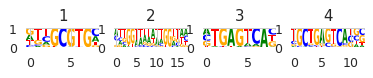

In [14]:
mb.pl.set_rcParams({'figure.figsize': [15, 3], 'figure.dpi': 90})
mb.pl.conv(model, title=False, xticks=False, rowspan_dinuc=0, rowspan_mono=1, n_rows=9, n_cols=12, stop_at=5) # n_cols=len(reduced_groups))


In [15]:
def unfreeze(model, feat_lab=None, position=None):
    # block mononucleotide but free dinucleotide and activities to calibrate themselves during training
    verbose = 1
    for ki in range(2 + 1):
        mask_pos = (ki == position if position is not None else True)
        mask_mono = (feat_lab == 'mono') and mask_pos
        mask_dinuc = (feat_lab == 'dinuc') and mask_pos
        if verbose != 0:
            print("setting grad status of kernel (mono, dinuc) at %i to (%i, %i)" % (ki, mask_mono, mask_dinuc))
        model.binding_modes.update_grad_mono(ki, mask_mono)
        model.binding_modes.update_grad_di(ki, mask_dinuc)

### Freeze weights and train

In [16]:
# unfreeze(model, None)
# model.binding_modes.update_grad_mono(0, True)
# model.binding_modes.update_grad_di(0, True)

In [17]:
import mubind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = 'annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker
import os
import scipy
import pickle

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cuda:0


In [18]:
pwd

'/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/theislab/mubind/docs/notebooks/scatac'

In [19]:
atac_path = '../../../../retina/notebooks/rnanatac/atac_test-pp_chr1.h5ad'
os.path.exists(atac_path)

True

In [20]:
!ls

00_prepare_genre.ipynb
01_1_scatac_pbmc_10x_de_novo.ipynb
01_2_scatac_pbmc_10x_episcanpy_priors.ipynb
01_2_scatac_pbmc_10x_priors.ipynb
02_1_scatac_multiome_pancreas_de_novo.ipynb
02_2_scatac_multiome_pancreas_priors.ipynb
02_3_scatac_retina.ipynb
03_1_scchipseq_multiome_de_novo.ipynb
04_0_viz_vector_scvelo.ipynb
data


In [21]:
cd ~/workspace/theislab/mubind/docs/notebooks/scatac

/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/theislab/mubind/docs/notebooks/scatac


In [22]:
!ls -ltrh $atac_path

-rwxrwxrwx 1 rio rio 5.5G Jan 13 09:11 ../../../../retina/notebooks/rnanatac/atac_test-pp_chr1.h5ad


In [23]:
import scanpy as sc
adata = sc.read_h5ad(atac_path)

/home/rio/miniconda3/envs/mubind/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [24]:
adata.obs

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,nonprimary,...,TSS_fragments,DNase_sensitive_region_fragments,enhancer_region_fragments,promoter_region_fragments,on_target_fragments,blacklist_region_fragments,peak_region_fragments,peak_region_cutsites,cellname,donor
AAACGAAAGAGGCCTA-1,0,22190.0,20654,93585,26246,110,577,7914,78,74,...,8101,0,0,0,8101,0,11602,20895,19_D019_macular_NeuN_3#AAACGAAAGAGGCCTA-1,19_D019
AAACGAATCAAGTTGC-1,0,6866.0,6088,20337,7350,10,255,1464,28,0,...,3721,0,0,0,3721,0,3594,6718,19_D019_macular_NeuN_3#AAACGAATCAAGTTGC-1,19_D019
AAACGAATCAGGTCTA-1,0,22044.0,19471,71863,27070,16,771,4489,45,22,...,8939,0,0,0,8939,0,14599,27082,19_D019_macular_NeuN_3#AAACGAATCAGGTCTA-1,19_D019
AAACGAATCCATACCC-1,0,19070.0,17344,66950,23016,30,515,5458,30,46,...,7837,0,0,0,7837,0,12097,22169,19_D019_macular_NeuN_3#AAACGAATCCATACCC-1,19_D019
AAACGAATCTTGGCCT-1,0,9565.0,8962,46544,16121,21,293,3944,367,38,...,3569,0,0,0,3569,0,5458,10047,19_D019_macular_NeuN_3#AAACGAATCTTGGCCT-1,19_D019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTCAGCAAACG-1,0,11856.0,9564,28834,12364,2,362,1875,0,3,...,7301,0,0,0,7301,0,9205,17647,GSM5567523_Hu5#TTTGTGTCAGCAAACG-1,GSM5567523_Hu5
TTTGTGTCAGGACCTC-1,0,10906.0,9260,28604,8636,3,173,2591,35,3,...,6018,0,0,0,6018,0,7023,13322,GSM5567523_Hu5#TTTGTGTCAGGACCTC-1,GSM5567523_Hu5
TTTGTGTCATGCACTA-1,0,16198.0,12574,41676,16298,7,511,3698,1,22,...,9906,0,0,0,9906,0,12180,23487,GSM5567523_Hu5#TTTGTGTCATGCACTA-1,GSM5567523_Hu5
TTTGTGTCATTAGCAC-1,0,5683.0,5343,31129,8582,27,214,3782,3128,14,...,2402,0,0,0,2402,0,2519,4702,GSM5567523_Hu5#TTTGTGTCATTAGCAC-1,GSM5567523_Hu5


In [25]:
adata

AnnData object with n_obs × n_vars = 43258 × 64153
    obs: 'orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'total', 'duplicate', 'chimeric', 'unmapped', 'lowmapq', 'mitochondrial', 'nonprimary', 'passed_filters', 'is__cell_barcode', 'excluded_reason', 'TSS_fragments', 'DNase_sensitive_region_fragments', 'enhancer_region_fragments', 'promoter_region_fragments', 'on_target_fragments', 'blacklist_region_fragments', 'peak_region_fragments', 'peak_region_cutsites', 'cellname', 'donor'

In [26]:
adata

AnnData object with n_obs × n_vars = 43258 × 64153
    obs: 'orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'total', 'duplicate', 'chimeric', 'unmapped', 'lowmapq', 'mitochondrial', 'nonprimary', 'passed_filters', 'is__cell_barcode', 'excluded_reason', 'TSS_fragments', 'DNase_sensitive_region_fragments', 'enhancer_region_fragments', 'promoter_region_fragments', 'on_target_fragments', 'blacklist_region_fragments', 'peak_region_fragments', 'peak_region_cutsites', 'cellname', 'donor'

In [27]:
sc.pp.neighbors(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [28]:
sc.tl.umap(adata)

/home/rio/miniconda3/envs/mubind/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


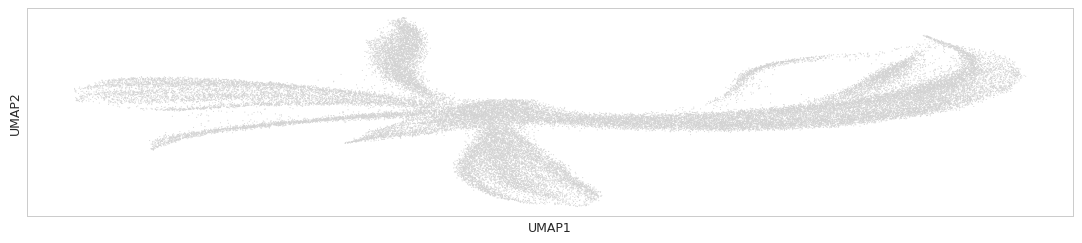

In [29]:
sc.pl.umap(adata)

In [30]:
# adata = adata[:,adata.var.modality == 'ATAC'].copy()

n_sample_cells = 2500
n_sample_peaks = 5000


In [31]:
adata.shape

(43258, 64153)

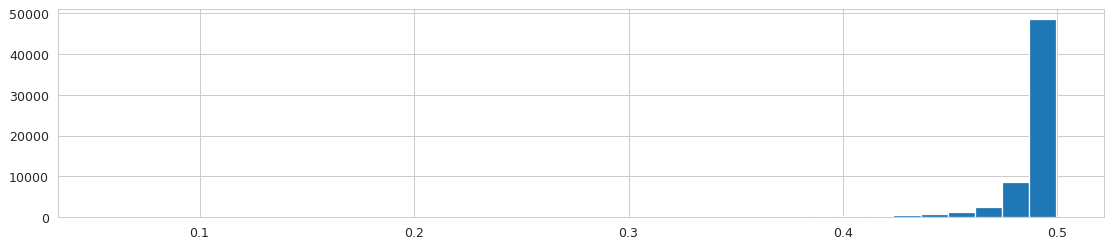

In [32]:
acc = (adata.X != 0).sum(axis=0) / adata.shape[0]
acc_score = abs(.5 - acc)
adata.var['acc_score'] = acc_score.A.T
adata.var['acc_score_rank'] = adata.var['acc_score'].rank(ascending=False)
plt.hist(adata.var['acc_score'], bins=35);

In [33]:
obs_sample = pd.Series(adata.obs_names).sample(n_sample_cells)
# var_sample = pd.Series(adata.var_names[adata.var['highly_variable']]).sample(n_sample_peaks)
var_sample = adata.var.sort_values('acc_score_rank').index[:n_sample_peaks]

ad = adata[adata.obs_names.isin(obs_sample),adata.var_names.isin(var_sample)]
ad.shape

(2626, 5000)

In [34]:
# sc.pp.neighbors(ad)
# sc.tl.umap(ad)

In [35]:
ad.obs.columns

Index(['orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'total', 'duplicate',
       'chimeric', 'unmapped', 'lowmapq', 'mitochondrial', 'nonprimary',
       'passed_filters', 'is__cell_barcode', 'excluded_reason',
       'TSS_fragments', 'DNase_sensitive_region_fragments',
       'enhancer_region_fragments', 'promoter_region_fragments',
       'on_target_fragments', 'blacklist_region_fragments',
       'peak_region_fragments', 'peak_region_cutsites', 'cellname', 'donor'],
      dtype='object')

/home/rio/miniconda3/envs/mubind/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


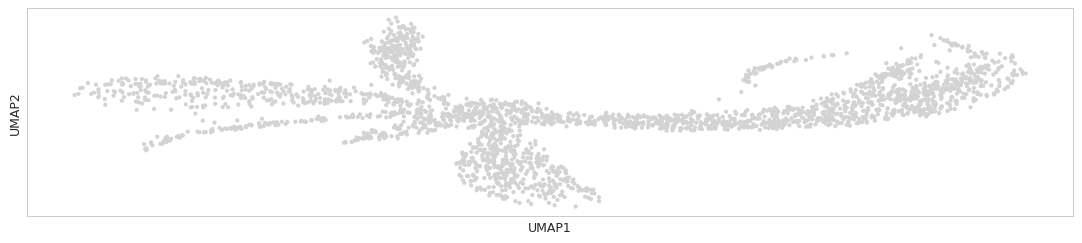

In [36]:
sc.pl.umap(ad)

In [37]:
ad.var_names

Index(['chr1-835451-835951', 'chr1-839517-840017', 'chr1-987675-988175',
       'chr1-989313-989813', 'chr1-1155718-1156218', 'chr1-1180586-1181086',
       'chr1-1449050-1449550', 'chr1-1703358-1703858', 'chr1-1967469-1967969',
       'chr1-1991890-1992390',
       ...
       'chr1-248030125-248030625', 'chr1-248115268-248115768',
       'chr1-248153850-248154350', 'chr1-248251332-248251832',
       'chr1-248316212-248316712', 'chr1-248418014-248418514',
       'chr1-248681618-248682118', 'chr1-248694351-248694851',
       'chr1-248701496-248701996', 'chr1-248737154-248737654'],
      dtype='object', length=5000)

In [38]:
ad.var['chr'] = ad.var_names.str.split('-').str[0]
ad.var['start'] = ad.var_names.str.split('-').str[1].astype(int)
ad.var['end'] = ad.var_names.str.split('-').str[2].astype(int)

/tmp/ipykernel_21324/464044379.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  ad.var['chr'] = ad.var_names.str.split('-').str[0]
/home/rio/miniconda3/envs/mubind/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/rio/miniconda3/envs/mubind/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [39]:
extend = 50

ad.var['chr'].value_counts()

chr1    5000
Name: chr, dtype: int64

In [40]:
ad.var

,acc_score,acc_score_rank,chr,start,end
chr1-835451-835951,0.498844,51.0,chr1,835451,835951
chr1-839517-840017,0.497850,1226.0,chr1,839517,840017
chr1-987675-988175,0.497226,3674.5,chr1,987675,988175
chr1-989313-989813,0.497180,3908.5,chr1,989313,989813
chr1-1155718-1156218,0.497342,3080.0,chr1,1155718,1156218
...,...,...,...,...,...
chr1-248418014-248418514,0.498798,62.0,chr1,248418014,248418514
chr1-248681618-248682118,0.497180,3908.5,chr1,248681618,248682118
chr1-248694351-248694851,0.497388,2856.0,chr1,248694351,248694851
chr1-248701496-248701996,0.497249,3557.0,chr1,248701496,248701996


In [41]:
ad.var['summit'] = ((ad.var['end'] + ad.var['start']) / 2).astype(int)
ad.var['summit.start'] = ad.var['summit'] - extend
ad.var['summit.end'] = ad.var['summit'] + extend
ad.var['k.summit'] = ad.var['chr'] + ':' + ad.var['summit.start'].astype(str) + '-' + ad.var['summit.end'].astype(str)

In [42]:
n_seqs = 10000 # adata.shape[1] # None # 1000
seqs = mb.bindome.tl.get_sequences_from_bed(ad.var[['chr', 'summit.start', 'summit.end']].head(n_seqs), genome='mm10', uppercase=True,
                                            gen_path='../../../annotations/hg38/genome/hg38.fa')
keys = set([s[0] for s in seqs])
ad = ad[:,ad.var['k.summit'].isin(keys)]
# seqs = [[s[0], s[1].upper()] for s in seqs[0]]

convert bed to fasta
/tmp/tmpbso8drsu
genome mm10 True
../../../annotations/hg38/genome/hg38.fa
True ../../../annotations/hg38/genome/hg38.fa
running bedtools...
bedtools getfasta -fi ../../../annotations/hg38/genome/hg38.fa -bed /tmp/tmpbso8drsu -fo /tmp/tmplsmcwl3k
get fasta
/tmp/tmplsmcwl3k


In [43]:
len(seqs)

5000

In [44]:
# remove Ns
for s in seqs:
    if 'N' in s:
        assert False
    # seqs = [[s[0], s[1].replace('N', '')] for s in seqs]
counts = ad.X.T

In [45]:
next_data = pd.DataFrame(counts.A) # sparse.from_spmatrix(counts.A)

# general binarization
# next_data[next_data != 0] = 1

In [46]:

next_data['var'] = next_data.var(axis=1)
# next_data = next_data[range(100)].copy()
next_data.index = [s[1] for s in seqs]
next_data.index.name = 'seq'
next_data.shape
# sum_index = next_data[next_data.columns[:-1]].var(axis=1).sort_values(ascending=False).index
n_cells = 10000
top_var = next_data[['var']].sort_values('var', ascending=False).index[:n_cells]
# next_data = next_data.head(10000)
next_data_sel = next_data.reindex(top_var) # .reset_index(drop=True)
next_data_sel
print(next_data_sel.shape)
del next_data_sel['var']
# next_data_sel.index = next_data_sel['seq']
# del next_data_sel['seq']

df = next_data_sel.copy() # sample
# df = df[df.columns[:5000]] # .head(100) # sample

# shorten sequences/remove duplicates
# df.index = df.index.astype(str).str[35:-35]
# df = df[~df.index.duplicated(keep='first')]

zero_counts = df.sum(axis=1) == 0

print(df.shape)
df = df[~zero_counts] # remove zeroes

df.shape

(5000, 2627)
(5000, 2626)


(4983, 2626)

In [47]:
zero_counts

seq
AGCTCCACTAGGCAGTGCCCCAGTGGCAACTCTGTTTGGGGGCTCCAACCCCACATATCCACTCTGCAGTACACTAGTAAAGGTTCTCCATAGGGCTGTG    False
TATTTTTTAGGCTTGGCACAGTGGCTCATGCCTATAATCCCAGTATTTTGGGAGGCCAAGGCAGGAGGATCACTTGATGCCAGGGATTTTAGGCCAGCCT    False
GCCAGCTGGTGGGAGTTAGTGAGGCAATCTGAGGACTTGGACAGATTGCTTTGTGTGCCGAGTTAACTGGCTCATATAGAGACTGAACCTGTGAGCCTGA    False
GGGAGCTAAATACTGAGTACTCATGAACATAAAGATGAGAACAGGCTGGGCACAGTGGTTCACGCCTGTAATCCCAGCACTTTGGGAGACCCAGGCAGGC    False
CCAGAAAAATAAAGGTGCAGAACATTGTAGTGTGCAGCTGATGGGTACACACGACCACTGGTTTCTCTTAGTGAAGAAGACCTCTTGAAAGATAGGCAAA    False
                                                                                                        ...  
GGCAGGTGAGAGGTGGGTATAGCATTTCAGGTCAGAATGGGGGTTCTCACAATTCATCAGTGTTCGCTCCCCAAATCTGGATTTACAGTCTGAAATGTTC     True
ACAGCCAGCAAGAAAACAGAGATCTCAGTCCTGCAGTCACAAGGAACTGAACTCAGCTGACAACCTGAGGAAACTTGAGAGGAAGTTCTTCCCCAGACCC     True
TGTGACTCAAATGATACACAGATTCCTGGGAGAGCAGTCATTTTTTCTGGACAATGCAGATCCCTTTTCACTAATCTTATTAAGAGATATTTTGAGCCTT     True
TTGGGT

In [48]:
df.shape

(4983, 2626)

In [49]:
df2 = df.reset_index().melt('seq').set_index('seq')
# add a baseline count
df2[0] = 1.0
cols = ['batch', 1, 0]
df2.columns = cols
df2 = df2[[0, 1, 'batch']] # cols[::-1]]
df2['batch'] = df2['batch'].astype(int)
print(df2.shape)
print(len(set(df2['batch'])))
n_cells = 200
df2 = df2[df2['batch'].isin(range(0, n_cells))]
print(df2['batch'].value_counts())
df2.head()

(13085358, 3)
2626
0      4983
137    4983
127    4983
128    4983
129    4983
       ... 
69     4983
70     4983
71     4983
72     4983
199    4983
Name: batch, Length: 200, dtype: int64


,0,1,batch
seq,,,
AGCTCCACTAGGCAGTGCCCCAGTGGCAACTCTGTTTGGGGGCTCCAACCCCACATATCCACTCTGCAGTACACTAGTAAAGGTTCTCCATAGGGCTGTG,1.0,0.0,0
TATTTTTTAGGCTTGGCACAGTGGCTCATGCCTATAATCCCAGTATTTTGGGAGGCCAAGGCAGGAGGATCACTTGATGCCAGGGATTTTAGGCCAGCCT,1.0,0.0,0
GCCAGCTGGTGGGAGTTAGTGAGGCAATCTGAGGACTTGGACAGATTGCTTTGTGTGCCGAGTTAACTGGCTCATATAGAGACTGAACCTGTGAGCCTGA,1.0,0.0,0
GGGAGCTAAATACTGAGTACTCATGAACATAAAGATGAGAACAGGCTGGGCACAGTGGTTCACGCCTGTAATCCCAGCACTTTGGGAGACCCAGGCAGGC,1.0,0.0,0
CCAGAAAAATAAAGGTGCAGAACATTGTAGTGTGCAGCTGATGGGTACACACGACCACTGGTTTCTCTTAGTGAAGAAGACCTCTTGAAAGATAGGCAAA,1.0,0.0,0


### This is the relatedness graph and used for dynamics filters learning

In [50]:
ad = ad[:,~zero_counts].copy()

/home/rio/miniconda3/envs/mubind/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [51]:
dataset = mb.datasets.SelexDataset(df, n_rounds=df.shape[1], enr_series=False)
len(set(dataset.batch))

1

In [52]:
n_batch = len(set(dataset.batch))
n_batch

1

In [53]:
train = tdata.DataLoader(dataset=dataset, batch_size=512, shuffle=True)


In [54]:
b = np.random.randint(0, 2, (3, 4))
conn = np.random.randint(0, 2, (4, 4))

In [55]:
n_kernels = len(reduced_groups)
# n_kernels = 8

In [56]:
import torch.optim as topti
import warnings
warnings.filterwarnings("ignore")

criterion = mb.tl.PoissonLoss()
# criterion = torch.nn.CrossEntropyLoss()

w = [r.shape[1] for r in reduced_groups]
model = mb.models.Multibind.make_model(train, n_kernels, criterion, kernels=[0, 2] + w,
                                       # use_dinuc=True, dinuc_mode='full',
                                       optimize_sym_weight=False,
                                       optimize_exp_barrier=True,
                                       optimize_log_dynamic=True,
                                       # optimize_prob_act=True,
                                       # p_dropout=.8,
                                       use_dinuc=False,
                                       device=device,
                                       dinuc_mode=None,
                                       prepare_knn=True,
                                       adata=ad) # .cuda()

# initialize the reduce kernels
for i, mono_best in enumerate(reduced_groups):
    if mono_best.shape[-1] == 0:
        continue
    # print(mono_best.shape, model.binding_modes.conv_mono[i + 1].weight.shape)
    # print(model.binding_modes.conv_mono[i + 1].weight.device)
    new_w = mono_best.reshape([1, 1] + list(mono_best.shape))
    model.binding_modes.conv_mono[i + 1].weight = torch.nn.Parameter(torch.tensor(new_w, dtype=torch.float))
    # print(model.binding_modes.conv_mono[i + 1].weight.device)
# move the model a final time to the GPU
model = model.to(device)


In [57]:
from IPython.core import ultratb; ultratb.VerboseTB._tb_highlight = "bg:ansired"

In [58]:
# model.prepare_knn(ad)
# if 'cuda' in str(device):
#     model.selex_module = model.selex_module.cuda()

True
12
0 out of 288...


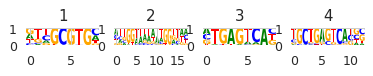

In [59]:
mb.pl.set_rcParams({'figure.figsize': [15, 3], 'figure.dpi': 90})
mb.pl.conv(model, title=False, xticks=False, rowspan_dinuc=0, rowspan_mono=1, n_rows=10, n_cols=12, stop_at=5) # n_cols=len(reduced_groups))

In [60]:
# model.binding_modes.prob_act

In [61]:
mb.pl.set_rcParams({'figure.figsize': [20, 5], 'figure.dpi': 100})
# mb.pl.conv(model, n_cols=2)


In [63]:
model, best_loss = model.optimize_iterative(train, n_epochs=[10], #  + [10] * (n_kernels + 1),
                                            show_logo=False, use_mono=True, use_dinuc=False, dinuc_mode='local',
                                            opt_kernel_shift=[0, 0] + [0] * (n_kernels),
                                            opt_kernel_length=[0, 0] + [0] * (n_kernels),
                                            opt_one_step=True,
                                            shift_max=1, shift_step=1, optimiser=topti.Adam,
                                            skip_kernels=range(1, 500),
                                            n_batches=1, n_rounds=2, num_epochs_shift_factor=1, # log_etas=log_etas, # log_etas=log_etas,
                                            kernels = [0] + [2] + [20] * (n_kernels), r2_per_epoch=True,
                                            exp_max=8,
                                            early_stopping=250, log_each=1, w=20, max_w=20) #  target_dim=train.dataset.signal.shape[1])

current kernels

Kernel to optimize 0

FREEZING KERNELS
optimizing feature type mono
kernels mask None
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 10 
early_stopping: 250
lr= 0.01, weight_decay= 0, dir weight= 0
Epoch:  2, Loss: 1.492080, R2: 0.00,  best epoch: 0,  secs per epoch: 57.029 s,  secs epoch*1k trials: 11.445s
Epoch:  3, Loss: 1.447185, R2: 0.00,  best epoch: 1,  secs per epoch: 49.756 s,  secs epoch*1k trials: 9.985s
Epoch:  4, Loss: 1.430639, R2: 0.00,  best epoch: 2,  secs per epoch: 47.846 s,  secs epoch*1k trials: 9.602s
Epoch:  5, Loss: 1.425468, R2: 0.00,  best epoch: 3,  secs per epoch: 47.252 s,  secs epoch*1k trials: 9.483s
Epoch:  6, Loss: 1.422850, R2: 0.00,  best epoch: 4,  secs per epoch: 46.547 s,  secs epoch*1k trials: 9.341s
Epoch:  7, Loss: 1.422238, R2: 0.00,  best epoch: 5,  secs per epoch: 45.782 s,  secs epoch*1k trials: 9.188s
Epoch:  8, Loss: 1.421535, R2: 0.00,  best epoch: 6,  secs per epoch: 45.302 s,  secs epoch*1k trials: 9.091s
Epoch:  9

In [64]:
print(model.selex_module.log_dynamic)
print(model.selex_module.log_etas)

Parameter containing:
tensor([0.4627, 0.4629, 0.4628,  ..., 0.5505, 0.4983, 0.4983], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([[ 0.8608, -0.0582,  0.7526,  ..., -0.4173,  1.0778, -1.8213]],
       device='cuda:0', requires_grad=True)


Text(0, 0.5, 'similar weights loss')

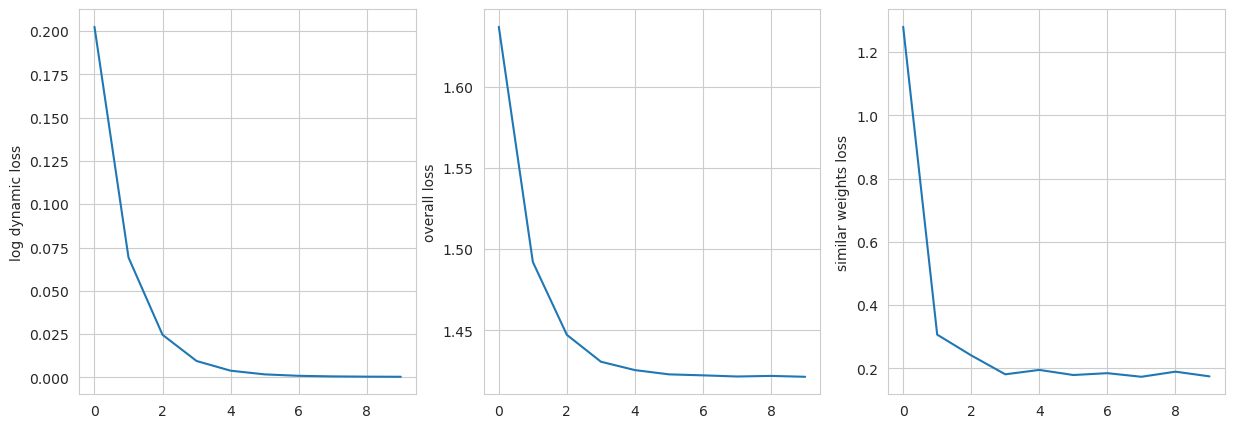

In [65]:
plt.subplot(1, 4, 1)
plt.plot(model.loss_history_log_dynamic)
plt.ylabel('log dynamic loss')
plt.subplot(1, 4, 2)
plt.plot(model.loss_history)
plt.ylabel('overall loss')
plt.subplot(1, 4, 3)
plt.plot(model.loss_history_sym_weights)
plt.ylabel('similar weights loss')


True
12
0 out of 288...
10 out of 288...


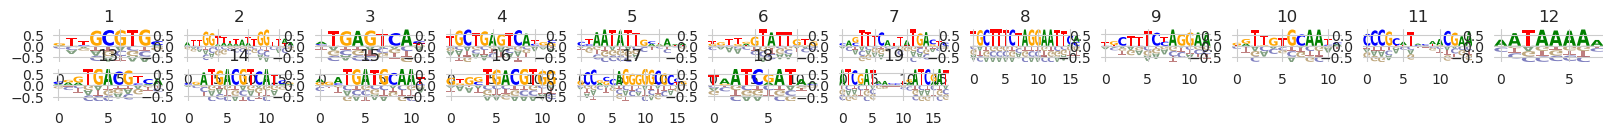

In [66]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 5
rcParams['figure.dpi'] = 100
mb.pl.conv(model, n_cols=12, n_rows=10, show=True, stop_at=20)
plt.show()


In [67]:
tsum = torch.sum
texp = torch.exp
tspa = torch.sparse_coo_tensor
tsmm = torch.sparse.mm
t = torch.transpose

# connectivities
C = model.selex_module.conn_sparse
a_ind = C.indices()

log_dynamic = model.selex_module.log_dynamic
D = model.selex_module.log_dynamic
D_tril = tspa(a_ind, D, C.shape)  # .requires_grad_(True).cuda()
D_triu = tspa(a_ind, -D, C.shape)  # .requires_grad_(True).cuda()
D = D_tril + t(D_triu, 0, 1)
# log_dynamic = log_dynamic + -torch.transpose(log_dynamic, 0, 1)
# triu_indices = torch.triu_indices(row=n_rounds, col=n_rounds, offset=1)
D

tensor(indices=tensor([[   0,    1,    1,  ...,  413, 2410, 2559],
                       [1245,  347, 1330,  ..., 2623, 2625, 2625]]),
       values=tensor([ 0.4627,  0.4629,  0.4628,  ..., -0.5505, -0.4983,
                      -0.4983]),
       device='cuda:0', size=(2626, 2626), nnz=7776, layout=torch.sparse_coo,
       grad_fn=<AddBackward0>)

<AxesSubplot: >

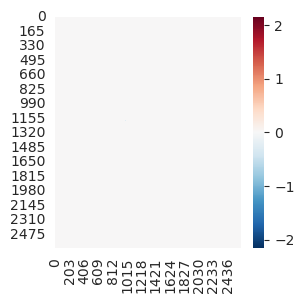

In [68]:
import seaborn as sns
mb.pl.set_rcParams({'figure.figsize': [3, 3]})
sns.heatmap(D.to_dense().detach().cpu(), cmap='RdBu_r')

In [69]:
model.best_r2_by_new_filter

[]

In [70]:
# contributions per newly added kernel
rcParams['figure.figsize'] = 2, 3
rcParams['figure.dpi'] = 80
import seaborn as sns
if len(model.best_r2_by_new_filter) != 0:
    r2 = pd.DataFrame(model.best_r2_by_new_filter, columns=['r2']).reset_index()
    sns.barplot(data=r2, x='index', y='r2')

In [71]:
# contributions per newly added kernel
rcParams['figure.figsize'] = 2, 3
rcParams['figure.dpi'] = 80
import seaborn as sns
if len(model.best_r2_by_new_filter) != 0:
    r2 = pd.DataFrame(model.best_r2_by_new_filter, columns=['r2']).reset_index()
    sns.barplot(data=r2, x='index', y='r2')

In [72]:
torch.set_printoptions(precision=2)
dynamic_score = D.to_dense().detach().cpu().sum(axis=0)


In [73]:

# dyn_score
dynamic_score = dynamic_score
dynamic_score = (dynamic_score - dynamic_score.min()) / (dynamic_score.max() - dynamic_score.min())
ad.obs['dynamic_score'] = dynamic_score

Text(0.5, 7.555555555555548, 'dynamic score (normalized)')

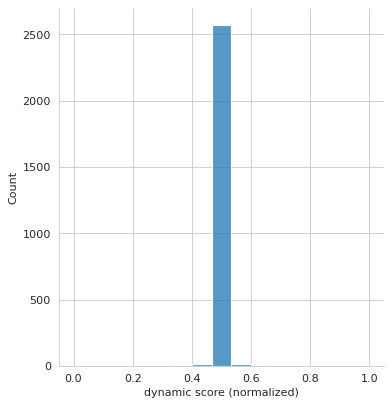

In [74]:
ad.obs['dynamic_score_cluster'] = np.where(dynamic_score > dynamic_score.mean(), 'dynamic', 'static')
z1 = np.where(((dynamic_score - dynamic_score.mean()) / dynamic_score.std()) > 1, 'dynamic', 'static')
z2 = np.where(((dynamic_score - dynamic_score.mean()) / dynamic_score.std()) > 2, 'dynamic', 'static')

ad.obs['dynamic_score_z1'] = z1
ad.obs['dynamic_score_z2'] = z2

#  ad.obs['dynamic_score_cluster'] = np.where(dynamic_score > .5, , 0)
sns.displot(dynamic_score, bins=15)
plt.xlabel('dynamic score (normalized)')


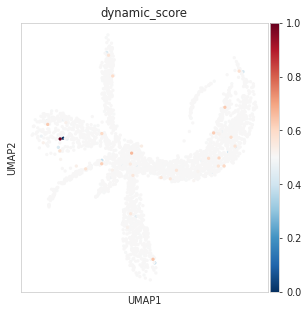

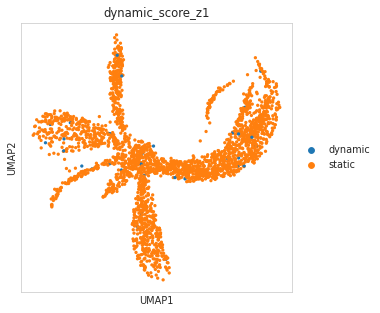

In [75]:
# contributions per newly added kernel
rcParams['figure.figsize'] = 5, 5
rcParams['figure.dpi'] = 70
sc.pl.umap(ad, color=['dynamic_score'], cmap='RdBu_r', sort_order=True)
sc.pl.umap(ad, color=['dynamic_score_z1'], cmap='RdBu_r', sort_order=True)


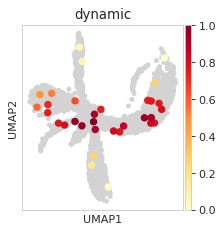

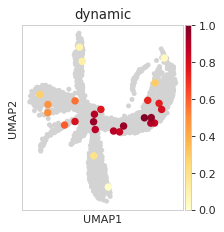

In [76]:
# contributions per newly added kernel
rcParams['figure.figsize'] = 2, 3
rcParams['figure.dpi'] = 80

sc.tl.embedding_density(ad, basis='umap', groupby='dynamic_score_z1')
sc.pl.embedding_density(ad, basis='umap', key='umap_density_dynamic_score_z1', group='dynamic') # basis='umap', groupby='dynamic_score_cluster')
sc.tl.embedding_density(ad, basis='umap', groupby='dynamic_score_z2')
sc.pl.embedding_density(ad, basis='umap', key='umap_density_dynamic_score_z2', group='dynamic') # basis='umap', groupby='dynamic_score_cluster')

In [77]:
sc.set_figure_params()

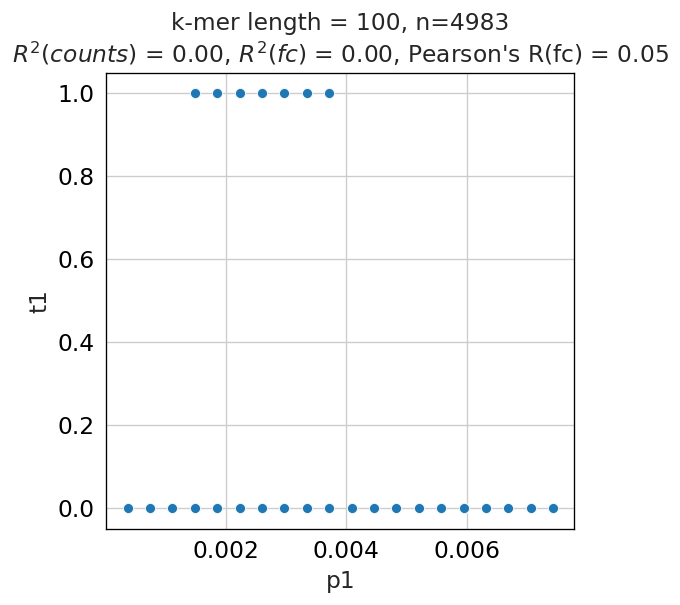

{'r2_counts': 0.004147812759384473,
 'r2_foldchange': 0.001599690771238338,
 'r2_enr': -0.002239565144832145,
 'r2_fc': 0.0023235779593802955,
 'pearson_foldchange': 0.04820350567521304}

In [78]:
mb.pl.set_rcParams({'figure.figsize': [5, 5], 'figure.dpi': 60})
mb.pl.kmer_enrichment(model, train, log_scale=False, style='scatter', ylab='t1', xlab='p1', k=100)


In [79]:
umap = ad.obsm['X_umap'].copy()
umap = np.sort(umap, 0)

x = umap[:,0]
y = umap[:,1]
X, Y = np.meshgrid(x, y)

n_points = x.shape[0]
# x-component to the right
u = np.ones((n_points, n_points))
# y-component zero
v = np.zeros((n_points, n_points))

In [80]:
D.shape

torch.Size([2626, 2626])

In [81]:
import scvelo as scv

In [82]:
ad.shape

(2626, 4983)

In [83]:
log_act = torch.exp(torch.stack(list(model.activities.log_activities), dim=1)).squeeze(0).T
log_act.shape

torch.Size([2626, 288])

In [84]:
train.dataset.mononuc.shape

(4983, 4, 100)

In [85]:
pred = []
for i, batch in enumerate(train):
    # Get a batch and potentially send it to GPU memory.
    mononuc = batch["mononuc"].to(device)
    # print(i, mononuc.shape)
    b = batch["batch"].to(device) if "batch" in batch else None
    rounds = batch["rounds"].to(device) if "rounds" in batch else None
    countsum = batch["countsum"].to(device) if "countsum" in batch else None
    seq = batch["seq"] if "seq" in batch else None
    residues = batch["residues"].to(device) if "residues" in batch else None
    if residues is not None and train.dataset.store_rev:
        mononuc_rev = batch["mononuc_rev"].to(device)
        inputs = {"mono": mononuc, "mono_rev": mononuc_rev, "batch": b, "countsum": countsum,
                  "residues": residues}
    elif residues is not None:
        inputs = {"mono": mononuc, "batch": b, "countsum": countsum, "residues": residues}
    elif train.dataset.store_rev:
        mononuc_rev = batch["mononuc_rev"].to(device)
        inputs = {"mono": mononuc, "mono_rev": mononuc_rev, "batch": b, "countsum": countsum}
    else:
        inputs = {"mono": mononuc, "batch": b, "countsum": countsum}

    inputs['scale_countsum'] = model.datatype == 'selex'
    output = model(**inputs, use_conn=False)

    output = output.cpu().detach().numpy()
    print('here...')
    print(output.shape)

    print(output.sum())
    pred.append(output)

pred = np.concatenate(pred).T
ad.layers['velocity'] = pred
ad.layers['counts'] = ad.X

here...
(512, 2626)
3677.0
here...
(512, 2626)
3551.9998
here...
(512, 2626)
3429.9993
here...
(512, 2626)
3477.9995
here...
(512, 2626)
3471.9995
here...
(512, 2626)
3680.001
here...
(512, 2626)
3534.9998
here...
(512, 2626)
3503.0
here...
(512, 2626)
3473.9998
here...
(375, 2626)
2634.0007


In [86]:
ad.layers['counts']

<2626x4983 sparse matrix of type '<class 'numpy.float32'>'
	with 31853 stored elements in Compressed Sparse Row format>

In [87]:
pred.shape

(2626, 4983)

In [88]:
ad.shape

(2626, 4983)

In [89]:
sc.pp.neighbors(ad)

In [90]:
# ad.layers['log_act'] = dyn_umap.X
# ad.layers['counts'] = ad.X
scv.tl.velocity_graph(ad, vkey='velocity', xkey='counts')

computing velocity graph (using 1/16 cores)


  0%|          | 0/2626 [00:00<?, ?cells/s]

    finished (0:00:32) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


ValueError: color key is invalid! pass valid observation annotation or a gene name

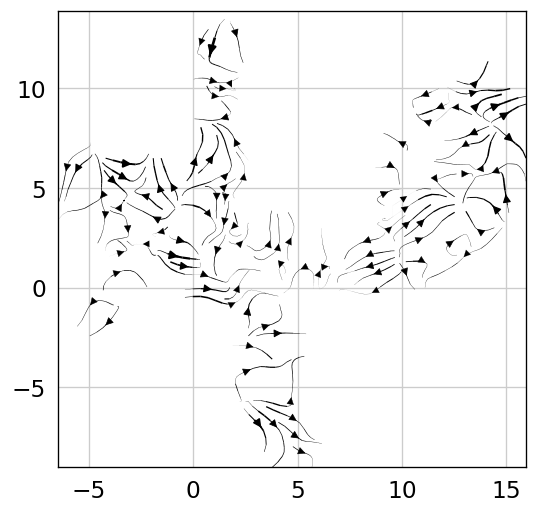

In [91]:
scv.pl.velocity_embedding_stream(ad, color='celltype') #  X_grid='X_umap', V=V)


In [ ]:
ad.shape

In [ ]:
act = torch.stack(list(model.activities.log_activities), dim=1).squeeze(0).T
# log_act = torch.exp(torch.stack(list(model.activities.log_activities), dim=1)).squeeze(0).T
# log_act


In [ ]:
vmax = act.abs().max()
sns.clustermap(act.detach().cpu().numpy(), cmap='RdBu_r', vmin=-vmax, vmax=vmax, yticklabels=False, figsize=[5, 5,])

In [ ]:

scv.pl.velocity_embedding_stream(ad, color='celltype') #  X_grid='X_umap', V=V)
